# Linear, Ridge, Lasso, and Logistic Regression Models

For this project, several models were employed to carry out the analysis. In the first scenario, a Linear regression model was developed to help predict the weight of the fish using its lengths, height, and width. In the second scenario, two different models are used to predict the weight. That is, the Ridge regression model, and the Lasso regression model. Lastly, is the use of a Logistic regression model that is modified to two-class and multi-class classification to understand its performance on the iris dataset.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
fishdata= pd.read_csv('D:\\Python\\Datafolder\\Fish data\\Fish.csv') 

In [6]:
fishdata.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [100]:
fishdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Visualizing the data

<AxesSubplot:xlabel='Species', ylabel='count'>

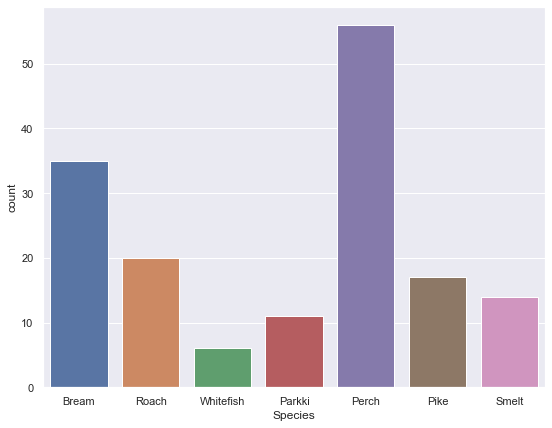

In [27]:
# How many species are in this data
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(x='Species', data=fishdata)

<AxesSubplot:>

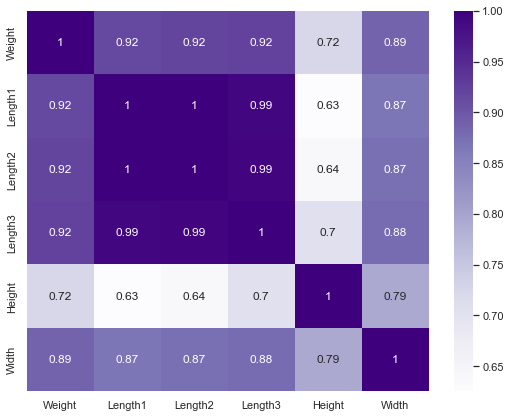

In [43]:
# Visualizing the correlations between variables
sns.set(rc={'figure.figsize':(9,7)})
sns.heatmap(fishdata.corr(), annot=True, cmap='Purples')

## Data wrangling  

In [44]:
# Checking for null values in the data
fishdata.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
# Dropping the species column
fishdata1=fishdata.drop('Species', axis=1)

In [56]:
fishdata1.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


## Data Training and Testing

In [8]:
# Dividing the data to independent and dependent variables
X = fishdata1.drop("Weight", axis=1)
y = fishdata1["Weight"]

In [6]:
# splitting the data into training and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

In [61]:
#Importing the Linear regression algorithm
from sklearn.linear_model import LinearRegression

lirmodel = LinearRegression()

In [69]:
# Trianing the model
lirmodel.fit(X_train, y_train)

LinearRegression()

In [70]:
# Using the model to predict
y_pred = lirmodel.predict(X_test)

## The coefficient values of the model

In [83]:
lirmodel.coef_

array([ 58.50297201,   3.22702894, -36.51057731,  25.82354203,
        36.66904584])

## The standard error/prediction error of the model

In [87]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

16062.71181399354

## The R sqaured score of the model

In [88]:
# Checking the R sqaured score of the model
from sklearn.metrics import r2_score
r2_score (y_test, y_pred)

0.8640949745089501

## Showing cross validation to avoid overfitting or underfitting the model

In [105]:
# importing cross validation and fitting the model
from sklearn.model_selection import cross_val_score
cross_val_score_trained = cross_val_score(lirmodel, X_train, y_train)

In [106]:
print (cross_val_score_trained)

[0.89318781 0.93481921 0.8605059  0.88057001 0.78006419]


## Dependence between length and the weight of the fish

In [112]:
# Creating the lengths and weight variables
fishdata2 = fishdata1[['Length1','Length2','Length3', 'Weight']]

In [114]:
# Correlation table showing the dependence
fishdata2.corr()

,Length1,Length2,Length3,Weight
Length1,1.000000,0.999517,0.992031,0.915712
Length2,0.999517,1.000000,0.994103,0.918618
Length3,0.992031,0.994103,1.000000,0.923044
Weight,0.915712,0.918618,0.923044,1.000000


## Lasso Regression Model

In [13]:
# Importing Lassso and creating its object
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, fit_intercept=False, tol=0.0001, max_iter=10000, positive=True)

In [14]:
# Dividing the data to independent and dependent variables
X1 = fishdata1.drop("Weight", axis=1)
y1 = fishdata1["Weight"]

In [15]:
# splitting the data into training and testing data 
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.3, random_state=1)

In [17]:
# Fit the Lasso model
lasso.fit(X1_train, y1_train)

Lasso(alpha=0.1, fit_intercept=False, max_iter=10000, positive=True)

In [89]:
# Using the model to predict
y1_pred = lasso.predict(X1_test)

In [90]:
# Checking the R sqaured score of the model
from sklearn.metrics import r2_score
r2_score (y1_test, y1_pred)

0.5735605473255974

In [18]:
# Lasso Coefficients
lasso.coef_

array([11.83187265,  0.        ,  0.        ,  0.        , 34.84626976])

## Ridge Model

In [45]:
from sklearn.linear_model import Ridge
Rng = Ridge(alpha=0.1, fit_intercept=False, max_iter=1000, tol=0.001)

In [46]:
# Fit the Ridge Model
Rng.fit(X1_train, y1_train)

Ridge(alpha=0.1, fit_intercept=False, max_iter=1000)

In [92]:
# Using the model to predict
y2_pred = Rng.predict(X1_test)

In [96]:
# Coefficients of the Ridge Model
Rng.coef_

array([174.57360837, -68.31165568, -79.2515505 ,  43.64599996,
       -22.51016906])

In [94]:
# the model score
Rng.score(X1_test, y1_test), Rng.score(X1_train, y1_train)

(0.6149853518962357, 0.6858812998754482)

## Logistics regression using iris dataset

In [19]:
# importing the iris dataset
from sklearn import datasets
import pandas as pd

In [2]:
# loading the iris dataset
irisdata = datasets.load_iris()

In [26]:
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#Dividing the dataset
X = irisdata.data
y = irisdata.target
 

In [4]:
# Dividing X, y into train and test data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

In [11]:
# importing the algorithm, where changing multi-class to 'ovr' and 'multinomial'
from sklearn.linear_model import LogisticRegression

logsmodel = LogisticRegression(multi_class="multinomial")

In [12]:
# Trianing the model
logsmodel.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [13]:
# Making predictions
predictions = logsmodel.predict(X_test)

In [14]:
# Creating reports
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## THE END